# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Theodore Dustin Pingnomo
- **Email:** m002d4ky2308@bangkit.academy
- **ID Dicoding:** dustannum

## Menentukan Pertanyaan Bisnis

1.   Kota dan negara bagian mana yang memiliki penjual terbanyak?
2.   Penjual mana yang paling banyak dan paling sedikit mendapat revenue?
3.   Bagaimana perbandingan revenue tiga penjual terbaik (berdasarkan revenue) selama beberapa bulan terakhir?
4.   Bagaimana perbandingan banyaknya pesanan yang dikonfirmasi oleh tiga penjual terbaik (berdasarkan revenue) selama beberapa bulan terakhir?
5.   Kapan terakhir penjual mengonfirmasi pembelian dari customer?
6.   Bagaimana frekuensi penjualan seorang penjual dalam beberapa bulan terakhir?
7.   Berapa banyak revenue yang diperoleh penjual dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### sellers_df

In [2]:
sellers_df = pd.read_csv("e-commerce-public-dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### orders_df

In [3]:
orders_df = pd.read_csv("e-commerce-public-dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### order_items_df

In [4]:
order_items_df = pd.read_csv("e-commerce-public-dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

#### sellers_df

In [5]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [6]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Data pada `sellers_df` sudah bersih

#### orders_df

In [8]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` seharusnya memiliki tipe data `datetime`


In [9]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Kolom `order_approved_at` akan digunakan sebagai patokan, sehingga baris dengan *missing values* pada kolom tersebut perlu dihapus

In [10]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [11]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### order_items_df

In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Kolom `shipping_limit_date` seharusnya memiliki tipe data `datetime`

In [14]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


### Cleaning Data

#### orders_df

##### Omit Rows with *missing values* on `order_approved_at`

In [17]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [18]:
orders_df.dropna(axis=0, subset=['order_approved_at'], inplace=True)
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64

##### Fix Inaccurate Data Types from `object` to `datetime`

In [19]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97644 non-null  datetime64[ns]
 6   order_delivered_customer_date  96462 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


#### order_items_df

##### Fix Inaccurate Data Types from `object` to `datetime`

In [20]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Explore sellers_df

#### Seller Demographics

In [21]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [22]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Explore order_items_df

#### Best & Worst Performing Sellers (based on Revenue)

In [23]:
sellers_by_revenue_df = order_items_df.groupby(by="seller_id").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values("price",ascending=False)
sellers_by_revenue_df.rename(columns={
  "order_id": "order_count",
  "price": "revenue"
}, inplace=True)
sellers_by_revenue_df

,order_count,revenue
seller_id,,
4869f7a5dfa277a7dca6462dcf3b52b2,1132,229472.63
53243585a1d6dc2643021fd1853d8905,358,222776.05
4a3ca9315b744ce9f8e9374361493884,1806,200472.92
fa1c13f2614d7b5c4749cbc52fecda94,585,194042.03
7c67e1448b00f6e969d365cea6b010ab,982,187923.89
...,...,...
34aefe746cd81b7f3b23253ea28bef39,1,8.00
702835e4b785b67a084280efca355756,1,7.60
1fa2d3def6adfa70e58c276bb64fe5bb,1,6.90


### Explore order_items_sellers_df

In [24]:
order_items_orders_df = pd.merge(
    left=order_items_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


#### Revenue vs Number of Orders Approved by Top 3 Sellers (based on Revenue)

In [25]:
seller_top1_df = order_items_orders_df[order_items_orders_df.seller_id == "4869f7a5dfa277a7dca6462dcf3b52b2"]
seller_top2_df = order_items_orders_df[order_items_orders_df.seller_id == "53243585a1d6dc2643021fd1853d8905"]
seller_top3_df = order_items_orders_df[order_items_orders_df.seller_id == "4a3ca9315b744ce9f8e9374361493884"]

In [26]:
monthly_orders_top1_df = seller_top1_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_top1_df.index = monthly_orders_top1_df.index.strftime('%Y-%m')
monthly_orders_top1_df = monthly_orders_top1_df.reset_index()
monthly_orders_top1_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_top1_df = pd.concat([monthly_orders_top1_df,pd.DataFrame({'order_approved_at':['2017-01', '2017-02'], 'order_count':[0,0], 'revenue':[0,0]})], ignore_index=True).sort_values("order_approved_at")
monthly_orders_top1_df = monthly_orders_top1_df.reset_index(drop=True)
monthly_orders_top1_df

,order_approved_at,order_count,revenue
0,2017-01,0,0.00
1,2017-02,0,0.00
2,2017-03,6,1620.00
3,2017-04,0,0.00
4,2017-05,2,374.00
5,2017-06,23,5064.85
6,2017-07,28,6351.40
7,2017-08,53,12236.68
8,2017-09,70,12536.40
9,2017-10,65,16548.70


In [27]:
monthly_orders_top2_df = seller_top2_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_top2_df.index = monthly_orders_top2_df.index.strftime('%Y-%m')
monthly_orders_top2_df = monthly_orders_top2_df.reset_index()
monthly_orders_top2_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_top2_df = pd.concat([monthly_orders_top2_df,pd.DataFrame({'order_approved_at':['2017-01', '2017-02','2017-03','2017-04','2017-05','2017-06','2017-07'], 'order_count':[0,0,0,0,0,0,0], 'revenue':[0,0,0,0,0,0,0]})], ignore_index=True).sort_values("order_approved_at")
monthly_orders_top2_df = monthly_orders_top2_df.reset_index(drop=True)
monthly_orders_top2_df

,order_approved_at,order_count,revenue
0,2017-01,0,0.00
1,2017-02,0,0.00
2,2017-03,0,0.00
3,2017-04,0,0.00
4,2017-05,0,0.00
5,2017-06,0,0.00
6,2017-07,0,0.00
7,2017-08,30,31722.00
8,2017-09,86,65591.57
9,2017-10,46,37367.99


In [28]:
monthly_orders_top3_df = seller_top3_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_top3_df.index = monthly_orders_top3_df.index.strftime('%Y-%m')
monthly_orders_top3_df = monthly_orders_top3_df.reset_index()
monthly_orders_top3_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_top3_df

,order_approved_at,order_count,revenue
0,2017-01,26,2186.20
1,2017-02,11,1437.20
2,2017-03,62,6680.20
3,2017-04,71,7138.50
4,2017-05,123,13502.30
5,2017-06,96,10182.00
6,2017-07,129,15019.29
7,2017-08,119,15997.70
8,2017-09,104,12719.20
9,2017-10,114,12360.95


### Explore all_df

In [29]:
all_df = pd.merge(
    left=order_items_orders_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,87900,loanda,PR


#### Omit Rows with *missing values* on `order_approved_at`

In [30]:
all_df[all_df.order_approved_at.isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state
8204,12a95a3c06dbaec84bcfb0e2da5d228a,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-21 12:05:55,79.99,15.77,NaN,NaN,NaT,NaT,NaT,NaT,NaT,3426,sao paulo,SP
19005,2babbb4b15e6d2dfe95e2de765c97bce,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 16:15:03,79.99,26.82,NaN,NaN,NaT,NaT,NaT,NaT,NaT,3426,sao paulo,SP
20473,2eecb0d85f281280f79fa00f9cec1a95,1,4fd676d9c4723d475026e40aeae56957,5fd924b4836098a5be0ecf81ba054ce0,2017-02-21 16:21:55,135.00,19.23,NaN,NaN,NaT,NaT,NaT,NaT,NaT,3554,sao paulo,SP
26393,3c0b8706b065f9919d0505d3b3343881,1,db8ed3d08891d16a2438a67ab3acb740,004c9cd9d87a3c30c522c48c4fc07416,2017-02-22 14:53:27,133.99,23.20,NaN,NaN,NaT,NaT,NaT,NaT,NaT,14940,ibitinga,SP
36128,51eb2eebd5d76a24625b31c33dd41449,1,7868a64aa111bbb4f41f8e1146c0becb,cca3071e3e9bb7d12640c9fbe2301306,2017-02-28 14:52:27,59.90,17.16,NaN,NaN,NaT,NaT,NaT,NaT,NaT,14940,ibitinga,SP
40822,5cf925b116421afa85ee25e99b4c34fb,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 15:48:35,79.99,26.82,NaN,NaN,NaT,NaT,NaT,NaT,NaT,3426,sao paulo,SP
49309,7002a78c79c519ac54022d4f8a65e6e8,1,c3b271f47e73d0c9ccf1b43b7606c705,cca3071e3e9bb7d12640c9fbe2301306,2017-01-29 22:26:59,45.90,14.52,NaN,NaN,NaT,NaT,NaT,NaT,NaT,14940,ibitinga,SP
49336,7013bcfc1c97fe719a7b5e05e61c12db,1,583916a5dae918f5e89baec139141c54,3481aa57cd91f9f9d3fa1fa12d9a3bf7,2017-02-22 12:29:47,49.99,15.53,NaN,NaN,NaT,NaT,NaT,NaT,NaT,13360,capivari,SP
59699,88083e8f64d95b932164187484d90212,1,8c5876b1c7768217964f353bc7e64393,0db783cfcd3b73998abc6e10e59a102f,2017-02-22 21:49:19,49.00,14.52,NaN,NaN,NaT,NaT,NaT,NaT,NaT,11010,santos,SP
59700,88083e8f64d95b932164187484d90212,2,8c5876b1c7768217964f353bc7e64393,0db783cfcd3b73998abc6e10e59a102f,2017-02-22 21:49:19,49.00,14.52,NaN,NaN,NaT,NaT,NaT,NaT,NaT,11010,santos,SP


In [31]:
all_df.dropna(axis=0, subset=['order_approved_at'], inplace=True)
all_df.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
dtype: int64

#### Export `all_df.csv`

In [32]:
all_df.to_csv("all_data.csv", index=False)

#### RFM Analysis

In [33]:
rfm_df = all_df.groupby(by="seller_id", as_index=False).agg({
    "order_approved_at": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["seller_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,seller_id,frequency,monetary,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,3,2685.00,320
1,001cca7ae9ae17fb1caed9dfb1094831,200,25080.03,53
2,001e6ad469a905060d959994f1b41e4f,1,250.00,27
3,002100f778ceb8431b7a1020ff7ab48f,51,1234.50,144
4,003554e2dce176b5555353e4f3555ac8,1,120.00,262


## Visualization & Explanatory Analysis

### Pertanyaan 1:
* Kota dan negara bagian mana yang memiliki penjual terbanyak?

<ipython-input-34-755abbb09b06>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


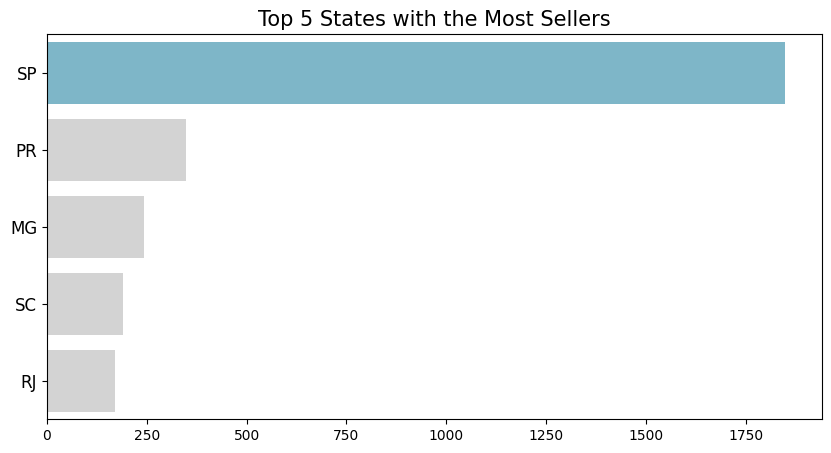

In [34]:
bystate_df = sellers_df.groupby(by="seller_state").seller_id.nunique().reset_index()
bystate_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="seller_count",
    y="seller_state",
    data=bystate_df.sort_values(by="seller_count", ascending=False).head(),
    palette=colors_
)
plt.title("Top 5 States with the Most Sellers", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Negara bagian dengan penjual terbanyak = Sao Paulo (1.849 penjual)

<ipython-input-35-1002fec99897>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


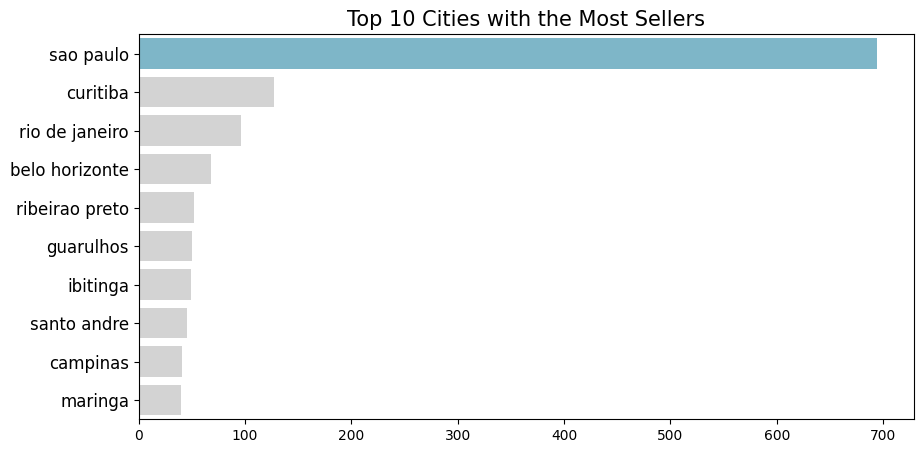

In [35]:
bycity_df = sellers_df.groupby(by="seller_city").seller_id.nunique().reset_index()
bycity_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
bycity_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="seller_count",
    y="seller_city",
    data=bycity_df.sort_values(by="seller_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Top 10 Cities with the Most Sellers", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Kota dengan penjual terbanyak = Sao Paulo (694 penjual)

### Pertanyaan 2:
* Penjual mana yang paling banyak dan paling sedikit mendapat revenue?

<ipython-input-36-5d44e6cefb62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="seller_id", data=sellers_by_revenue_df.head(5), palette=colors, ax=ax[0])
<ipython-input-36-5d44e6cefb62>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="seller_id", data=sellers_by_revenue_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])


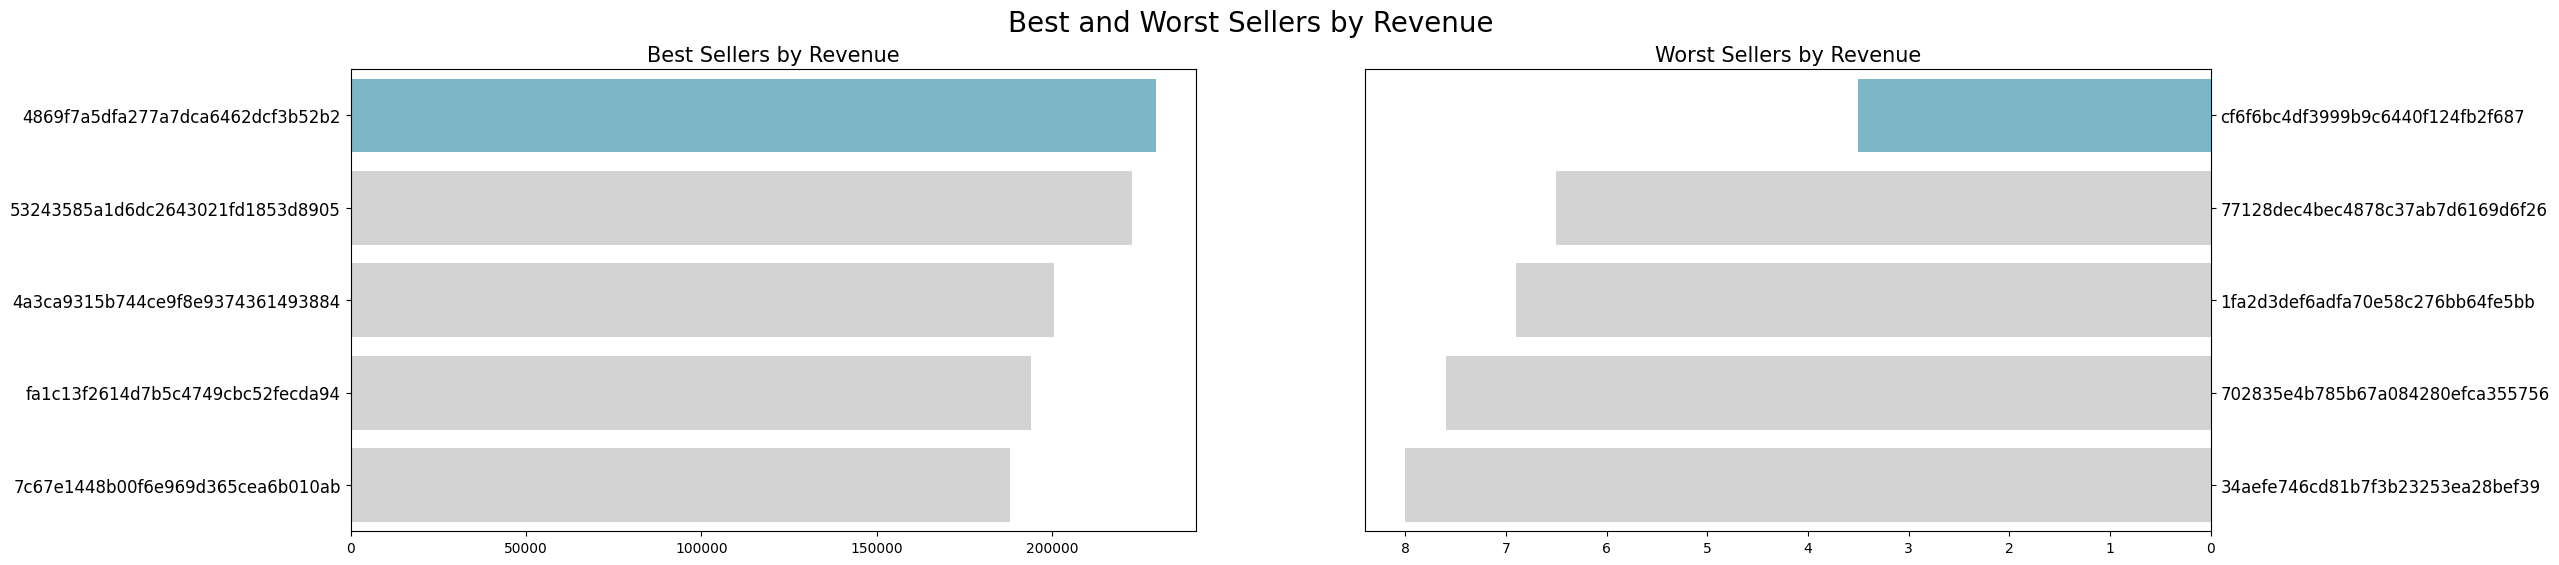

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="revenue", y="seller_id", data=sellers_by_revenue_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Sellers by Revenue", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="revenue", y="seller_id", data=sellers_by_revenue_df.sort_values(by="revenue", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Sellers by Revenue", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Sellers by Revenue", fontsize=20)
plt.show()

* Best Performing Seller = 4869f7a5dfa277a7dca6462dcf3b52b2 (229.472,63)
* Worst Performing Seller = cf6f6bc4df3999b9c6440f124fb2f687 (3,50)

### Pertanyaan 3 dan 4:
* Bagaimana perbandingan revenue tiga penjual terbaik (berdasarkan revenue) selama beberapa bulan terakhir?
* Bagaimana perbandingan banyaknya pesanan yang dikonfirmasi oleh tiga penjual terbaik (berdasarkan revenue) selama beberapa bulan terakhir?

* Merah = Best Seller
* Biru = 2nd Best Seller
* Hijau = 3rd Best Seller

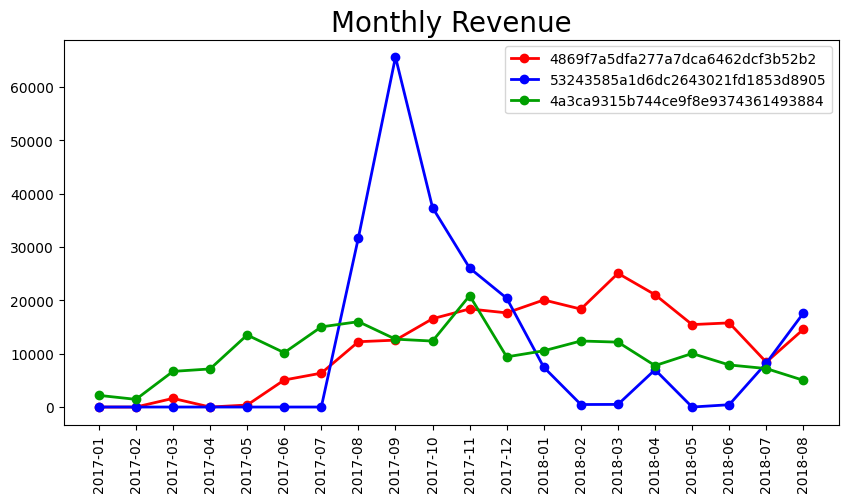

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_top1_df["order_approved_at"], monthly_orders_top1_df["revenue"], marker='o', linewidth=2, color="#ff0000")
plt.plot(monthly_orders_top2_df["order_approved_at"], monthly_orders_top2_df["revenue"], marker='o', linewidth=2, color="#0000ff")
plt.plot(monthly_orders_top3_df["order_approved_at"], monthly_orders_top3_df["revenue"], marker='o', linewidth=2, color="#009f00")
plt.title("Monthly Revenue", loc="center", fontsize=20)
plt.legend(['4869f7a5dfa277a7dca6462dcf3b52b2','53243585a1d6dc2643021fd1853d8905','4a3ca9315b744ce9f8e9374361493884'])
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

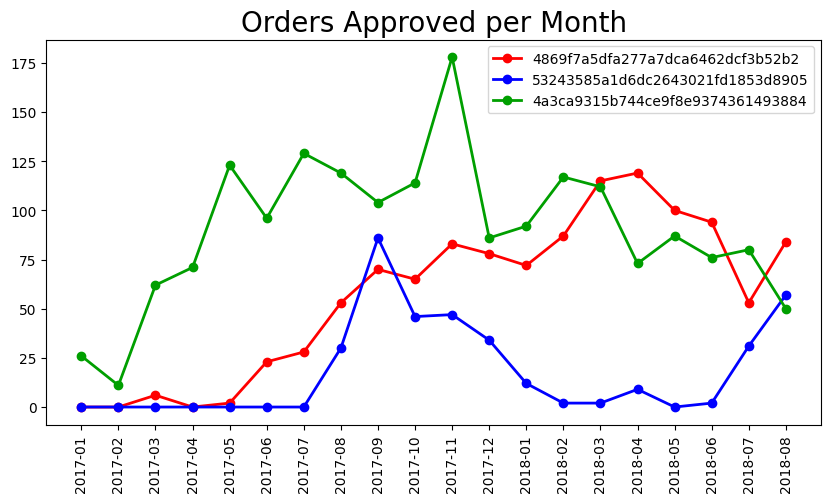

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_top1_df["order_approved_at"], monthly_orders_top1_df["order_count"], marker='o', linewidth=2, color="#ff0000")
plt.plot(monthly_orders_top2_df["order_approved_at"], monthly_orders_top2_df["order_count"], marker='o', linewidth=2, color="#0000ff")
plt.plot(monthly_orders_top3_df["order_approved_at"], monthly_orders_top3_df["order_count"], marker='o', linewidth=2, color="#009f00")
plt.title("Orders Approved per Month", loc="center", fontsize=20)
plt.legend(['4869f7a5dfa277a7dca6462dcf3b52b2','53243585a1d6dc2643021fd1853d8905','4a3ca9315b744ce9f8e9374361493884'])
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 5, 6, dan 7:
* Kapan terakhir penjual mengonfirmasi pembelian dari customer?
* Bagaimana frekuensi penjualan seorang penjual dalam beberapa bulan terakhir?
* Berapa banyak revenue yang diperoleh penjual dalam beberapa bulan terakhir?

<ipython-input-39-5ed099b11ec4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="seller_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-39-5ed099b11ec4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="seller_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-39-5ed099b11ec4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="seller_id", data=rfm_df.sort_values(by="moneta

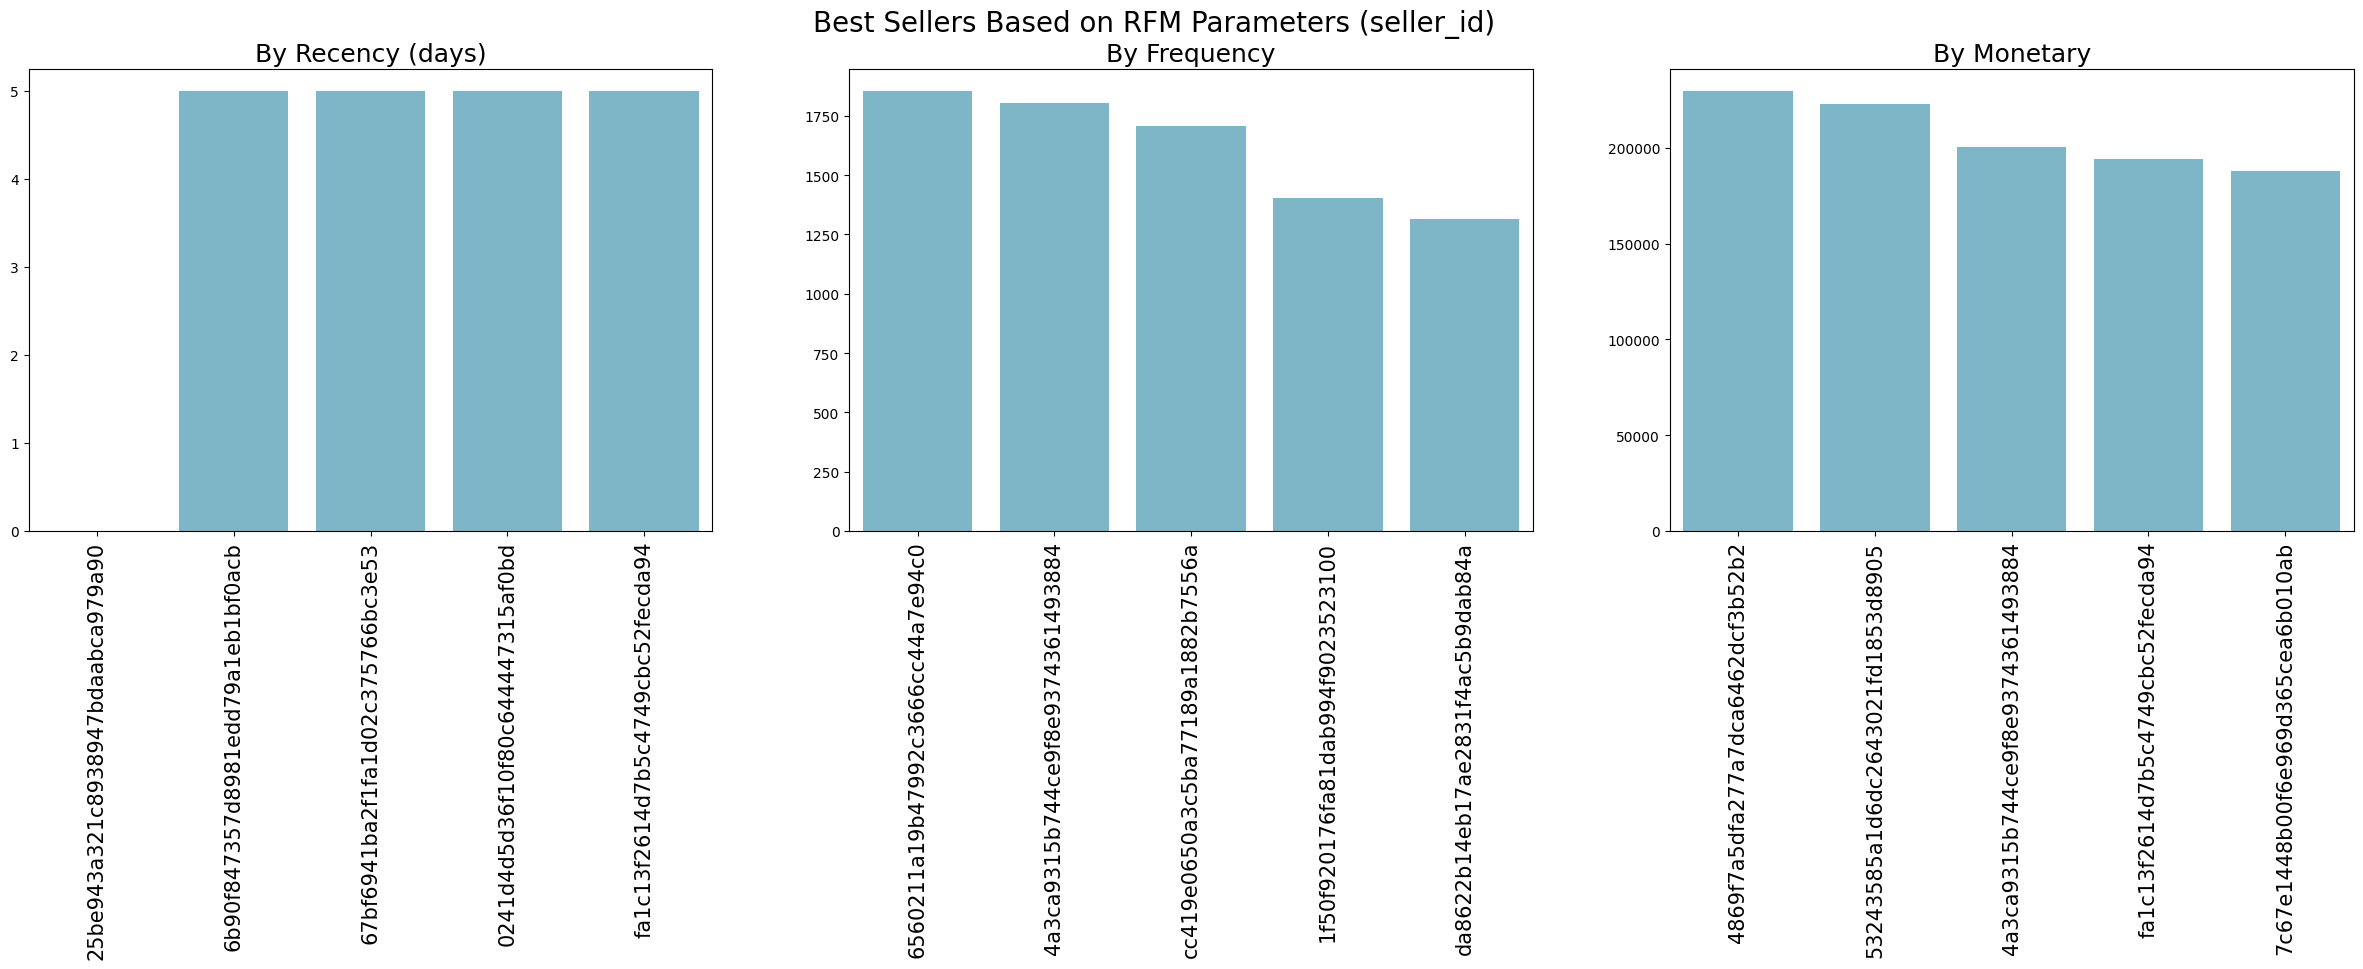

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="seller_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', rotation=90, labelsize=15)

sns.barplot(y="frequency", x="seller_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=90, labelsize=15)

sns.barplot(y="monetary", x="seller_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=90, labelsize=15)

plt.suptitle("Best Sellers Based on RFM Parameters (seller_id)", fontsize=20)
plt.show()

## Conclusion

1.   Kota dengan penjual terbanyak adalah Sao Paulo dengan 694 penjual, dan negara bagian dengan penjual terbanyak adalah Sao Paulo dengan 1.849 penjual.
2.   Penjual dengan revenue terbesar adalah 4869f7a5dfa277a7dca6462dcf3b52b2 dengan total revenue sebesar 229.472,63, sedangkan penjual dengan revenue terkecil adalah cf6f6bc4df3999b9c6440f124fb2f687 dengan total revenue sebesar 3,50.
3.   Penjual 4869f7a5dfa277a7dca6462dcf3b52b2 memiliki revenue bulanan yang cenderung naik; penjual 53243585a1d6dc2643021fd1853d8905 memiliki revenue bulanan yang melonjak pada bulan September 2017; penjual 4a3ca9315b744ce9f8e9374361493884 memiliki revenue bulanan yang cukup stabil.
4.   Grafik banyak pesanan yang diterima penjual 4869f7a5dfa277a7dca6462dcf3b52b2 per bulan serupa dengan grafik revenue yang dimilikinya; banyak pesanan yang diterima penjual 53243585a1d6dc2643021fd1853d8905 cenderung lebih sedikit daripada kedua penjual terbaik lainnya, sehingga dapat disimpulkan bahwa tiap pesanan yang diterima penjual tersebut menghasilkan revenue yang cenderung besar; banyak pesanan yang diterima penjual 4a3ca9315b744ce9f8e9374361493884 cenderung lebih banyak daripada kedua penjual terbaik lainnya, sehingga dapat disimpulkan bahwa tiap pesanan yang diterima penjual tersebut menghasilkan revenue yang cenderung kecil.
5.   Penjual 25be943a321c8938947bdaabca979a90 adalah penjual yang mengonfirmasi pesanan terkini.
6.   Penjual 6560211a19b47992c3666cc44a7e94c0 memiliki frekuensi penjualan terbanyak sebesar 1.854 pesanan.
7.   Penjual 4869f7a5dfa277a7dca6462dcf3b52b2 memiliki revenue terbesar sebesar 229.472,63.